## SenNetworks: Hacking the Human Vasculature in 3D

#### Authors: Andrew Kettle and Hitarth Ghandi

In [13]:
# Packages
import numpy as np
import cv2
import matplotlib.pyplot as plt
import torch
import torchvision.transforms.functional as TF
import torchvision.io
import pandas as pd
import os
import shutil

In [14]:
# Rename items in the dataset so there is no overlap (only run this once!)
def renameDataset():
	root_dir = os.path.join(os.getcwd(), "data")
	train_dir = os.path.join(root_dir, "train")

	paths = os.listdir(train_dir)
	paths = [os.path.join(train_dir, p) for p in paths]

	# Iterate over each subset
	for p in paths:	
		
		image_path = os.path.join(p, "images")
		label_path = os.path.join(p, "labels")
		image_names = os.listdir(image_path)
		label_names = os.listdir(label_path)

		# Name to append for each file (splitting is platform specific)
		append_name = p.split('/')[-1]

		revised_image_names = [append_name + '_' + name for name in image_names]
		revised_label_names = [append_name + '_' + name for name in label_names]

		# Rename images
		for iname, upiname in zip(image_names, revised_image_names):
			shutil.move(os.path.join(image_path, iname), os.path.join(image_path, upiname))
		# Rename labels
		for lname, uplname in zip(label_names, revised_label_names):
			shutil.move(os.path.join(label_path, lname), os.path.join(label_path, uplname))

# renameDataset()

In [15]:
class SenDataset(torch.utils.data.Dataset):

	def __init__(self, root_dir):
		self.root_dir = root_dir
		self.train_dir = os.path.join(root_dir, "train")
		self.image_paths = []
		self.label_paths = []
		self.buildDataset()

	def buildDataset(self):
		paths = os.listdir(self.train_dir)
		paths = [os.path.join(self.train_dir, p) for p in paths]

		for p in paths:
			image_path = os.path.join(p, "images")
			label_path = os.path.join(p, "labels")

			image_names = [os.path.join(image_path, name) for name in os.listdir(image_path)]
			label_names = [os.path.join(label_path, name) for name in os.listdir(label_path)]

			self.image_paths.append(np.array(image_names))
			self.label_paths.append(np.array(label_names))
		
		self.image_paths = np.concatenate(self.image_paths)
		self.label_paths = np.concatenate(self.label_paths)

	def __len__(self):
		return len(self.image_paths)

	def __getitem__(self, idx):
		image = cv2.imread(self.image_paths[idx])
		label = cv2.imread(self.label_paths[idx])
		return image, label

(1041, 1511, 3)
(1041, 1511, 3)


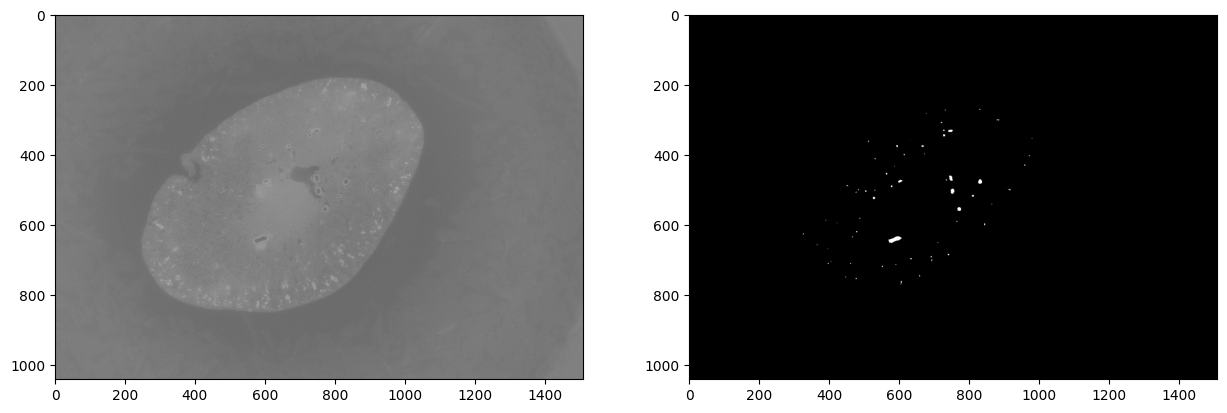

In [16]:
ds = SenDataset(os.path.join(os.getcwd(), 'data'))

image, label = ds.__getitem__(3)

print(image.shape)
print(label.shape)

# Display image
fig, ax = plt.subplots(1, 2, figsize=(15, 15))
ax[0].imshow(image)
ax[1].imshow(label)
plt.show()